In [1]:
from MIDI_ACAI import ACAI_autoencoder

hidden_dim = 400
latent_dim = 12
path = "./midi_acai/"
acai = ACAI_autoencoder(hidden_dim=hidden_dim, latent_dim=latent_dim)
acai.decoder.load_weights(path+'decoder/')
acai.encoder.load_weights(path+'encoder/')
acai.critic.load_weights(path+'critic/')

In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 
from MIDI_utils import get_midi_data
data = get_midi_data() 

In [7]:
# Parameters 
d1_idx = 3030
d2_idx = 1050
d1, d2 = data[d1_idx, :], data[d2_idx, :]

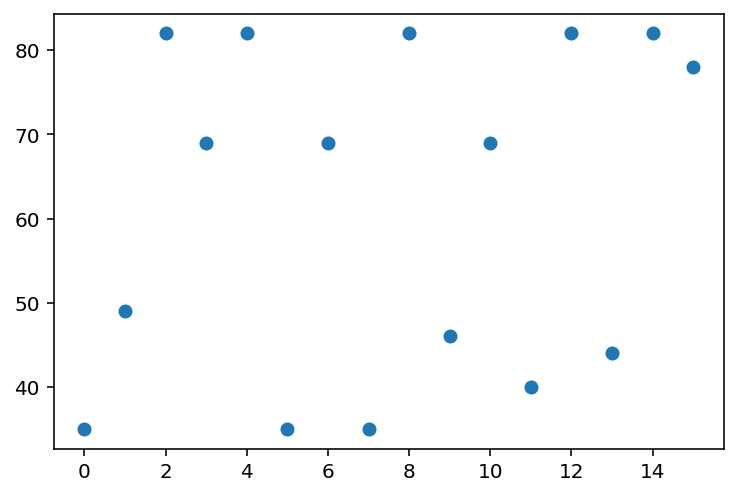

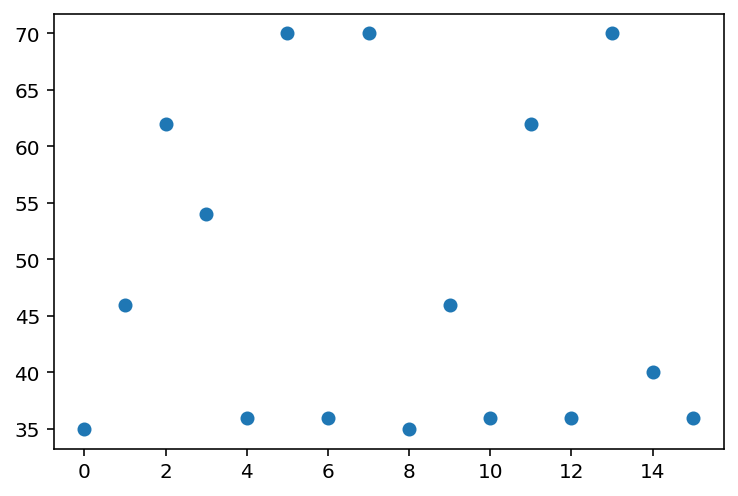

In [10]:
plt.figure()
plt.scatter(np.arange(16), d1);
plt.figure()
plt.scatter(np.arange(16), d2);

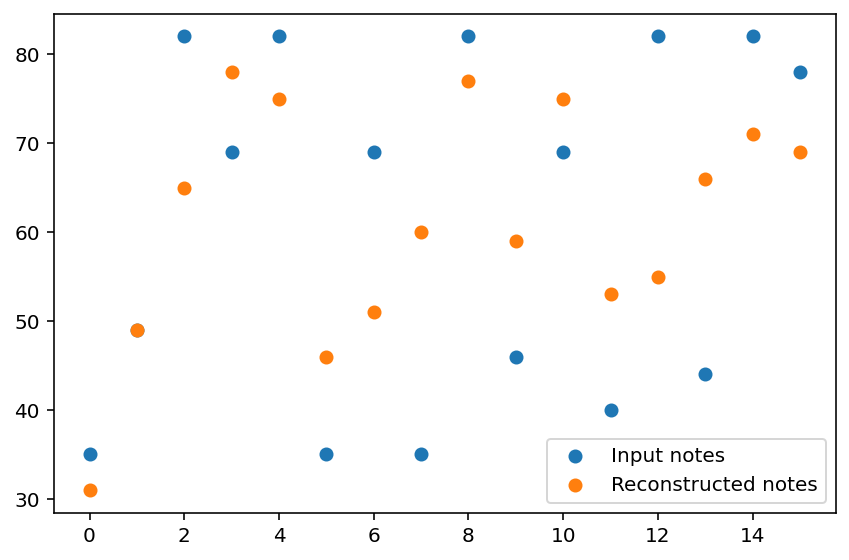

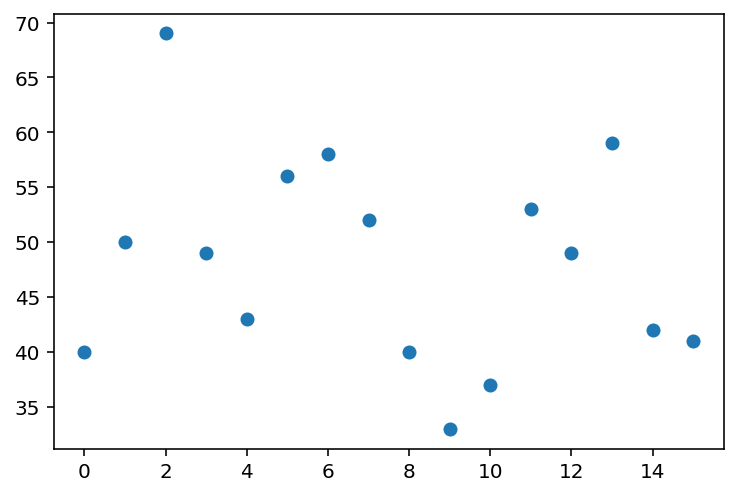

In [16]:
# Autoencoder's reconstruction 
d1z = acai.encoder(tf.reshape(d1, [1, 16]))
d2z = acai.encoder(tf.reshape(d2, [1, 16]))
d1_out = acai.decoder(d1z)
d2_out = acai.decoder(d2z)
#print(d1_out)
plt.figure()
plt.scatter(np.arange(16), d1, label="Input notes");
plt.scatter(np.arange(16), tf.round(d1_out[0, :]), label="Reconstructed notes");
plt.legend()
plt.tight_layout()
plt.savefig("MIDI_result.png")
plt.figure()
plt.scatter(np.arange(16), tf.round(d2_out[0, :]));